In [421]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [422]:
#import pyforest

In [423]:
# EDA (Exploratory Data Analysis)


In [424]:
df = pd.read_csv("Copy of Sample_DATA.csv")

In [425]:
df.head(5)

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25/06/23,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28/01/24,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21/06/23,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [426]:
df.shape

(647, 20)

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                647 non-null    object 
 1   Date                          647 non-null    object 
 2   Time                          647 non-null    object 
 3   Merchant_ID                   647 non-null    object 
 4   Customer_ID                   647 non-null    object 
 5   Device_ID                     647 non-null    object 
 6   Transaction_Type              647 non-null    object 
 7   Payment_Gateway               647 non-null    object 
 8   Transaction_City              647 non-null    object 
 9   Transaction_State             647 non-null    object 
 10  IP_Address                    647 non-null    object 
 11  Transaction_Status            647 non-null    object 
 12  Device_OS                     647 non-null    object 
 13  Trans

In [428]:
int_df = df.select_dtypes(include=['int64', 'float64'])

In [429]:
int_df.describe()

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
count,647.000000,647.000000,647.000000,647.000000,647.000000
mean,3.564142,5.014668,15.717156,128.839753,0.239567
std,6.454543,56.375914,8.218122,364.995747,0.427150
min,0.000000,-99.470000,1.000000,0.120000,0.000000
25%,1.000000,-42.355000,8.500000,17.155000,0.000000
50%,2.000000,8.380000,16.000000,35.000000,0.000000
75%,3.000000,52.290000,23.000000,74.770000,0.000000
max,50.000000,99.450000,29.000000,4883.620000,1.000000


In [430]:
int_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_Frequency         647 non-null    int64  
 1   Transaction_Amount_Deviation  647 non-null    float64
 2   Days_Since_Last_Transaction   647 non-null    int64  
 3   amount                        647 non-null    float64
 4   fraud                         647 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 25.4 KB


In [431]:
#find null values
df.isnull().sum()

Transaction_ID                  0
Date                            0
Time                            0
Merchant_ID                     0
Customer_ID                     0
Device_ID                       0
Transaction_Type                0
Payment_Gateway                 0
Transaction_City                0
Transaction_State               0
IP_Address                      0
Transaction_Status              0
Device_OS                       0
Transaction_Frequency           0
Merchant_Category               0
Transaction_Channel             0
Transaction_Amount_Deviation    0
Days_Since_Last_Transaction     0
amount                          0
fraud                           0
dtype: int64

In [432]:
int_df.isnull().sum()

Transaction_Frequency           0
Transaction_Amount_Deviation    0
Days_Since_Last_Transaction     0
amount                          0
fraud                           0
dtype: int64

In [433]:
df.shape

(647, 20)

In [434]:
df.nunique()

Transaction_ID                  647
Date                            302
Time                            641
Merchant_ID                     647
Customer_ID                     647
Device_ID                       647
Transaction_Type                  7
Payment_Gateway                   9
Transaction_City                281
Transaction_State                28
IP_Address                      647
Transaction_Status                3
Device_OS                         4
Transaction_Frequency            14
Merchant_Category                10
Transaction_Channel               3
Transaction_Amount_Deviation    635
Days_Since_Last_Transaction      29
amount                          633
fraud                             2
dtype: int64

In [435]:
df=df.drop(['Transaction_ID','Merchant_ID'] , axis=1)

In [436]:
df.columns

Index(['Date', 'Time', 'Customer_ID', 'Device_ID', 'Transaction_Type',
       'Payment_Gateway', 'Transaction_City', 'Transaction_State',
       'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

In [437]:
df.drop(['Customer_ID', 'Device_ID',  'IP_Address'] ,axis=1, inplace=True)

In [438]:
df.columns

Index(['Date', 'Time', 'Transaction_Type', 'Payment_Gateway',
       'Transaction_City', 'Transaction_State', 'Transaction_Status',
       'Device_OS', 'Transaction_Frequency', 'Merchant_Category',
       'Transaction_Channel', 'Transaction_Amount_Deviation',
       'Days_Since_Last_Transaction', 'amount', 'fraud'],
      dtype='object')

In [439]:
df.columns.value_counts()

Date                            1
Time                            1
Transaction_Type                1
Payment_Gateway                 1
Transaction_City                1
Transaction_State               1
Transaction_Status              1
Device_OS                       1
Transaction_Frequency           1
Merchant_Category               1
Transaction_Channel             1
Transaction_Amount_Deviation    1
Days_Since_Last_Transaction     1
amount                          1
fraud                           1
Name: count, dtype: int64

**data cleaning and preprocessing**


In [440]:
df[['Date' , 'Time']]

,Date,Time
0,20/04/23,4:50:22 AM
1,08/08/23,8:09:21 AM
2,25/06/23,7:49:01 AM
3,28/01/24,5:44:12 AM
4,21/06/23,9:40:59 AM
...,...,...
642,24/07/23,3:12:04 AM
643,05/07/23,6:21:18 AM
644,16/04/23,8:32:41 AM
645,28/10/23,9:33:42 AM


In [441]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,20/04/23,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,08/08/23,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,25/06/23,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,28/01/24,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,21/06/23,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [442]:
df.columns

Index(['Date', 'Time', 'Transaction_Type', 'Payment_Gateway',
       'Transaction_City', 'Transaction_State', 'Transaction_Status',
       'Device_OS', 'Transaction_Frequency', 'Merchant_Category',
       'Transaction_Channel', 'Transaction_Amount_Deviation',
       'Days_Since_Last_Transaction', 'amount', 'fraud'],
      dtype='object')

In [443]:
#importing data time module
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')




In [444]:
df['year'] =df['Date'].dt.year

In [445]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,year
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023


###create a month columns with month transaction~

In [446]:
df['month'] = df['Date'].dt.month

In [447]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,year,month
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,4
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,8
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,6
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,1
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,6


In [448]:
df['month'].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Months columns have format "MMM" as compared to number 1 -12

In [449]:
month_dict = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",   
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}

In [450]:
month_dict

{1: 'Jan',
 2: 'Feb',
 3: 'Mar',
 4: 'Apr',
 5: 'May',
 6: 'Jun',
 7: 'Jul',
 8: 'Aug',
 9: 'Sep',
 10: 'Oct',
 11: 'Nov',
 12: 'Dec'}

In [451]:
df['month'] =df['month'].map(month_dict)

In [452]:
df.month

0      Apr
1      Aug
2      Jun
3      Jan
4      Jun
      ... 
642    Jul
643    Jul
644    Apr
645    Oct
646    Apr
Name: month, Length: 647, dtype: object

In [453]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,year,month
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [454]:
df.columns

Index(['Date', 'Time', 'Transaction_Type', 'Payment_Gateway',
       'Transaction_City', 'Transaction_State', 'Transaction_Status',
       'Device_OS', 'Transaction_Frequency', 'Merchant_Category',
       'Transaction_Channel', 'Transaction_Amount_Deviation',
       'Days_Since_Last_Transaction', 'amount', 'fraud', 'year', 'month'],
      dtype='object')

In [455]:
df['Date'].drop

<bound method Series.drop of 0     2023-04-20
1     2023-08-08
2     2023-06-25
3     2024-01-28
4     2023-06-21
         ...    
642   2023-07-24
643   2023-07-05
644   2023-04-16
645   2023-10-28
646   2024-04-11
Name: Date, Length: 647, dtype: datetime64[ns]>

In [456]:
df = df.drop(['Date', 'Time'] , axis=1)

In [457]:
df.head()

,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,year,month
0,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [458]:
df['fraud'].value_counts(normalize=True)*100

fraud
0    76.043277
1    23.956723
Name: proportion, dtype: float64

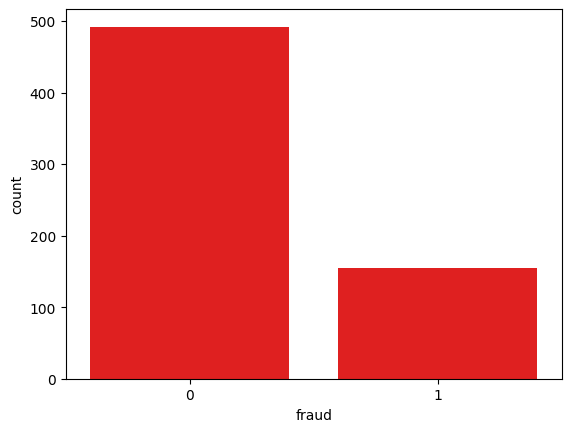

In [459]:
sns.countplot(x='fraud', data=df , color='red')
plt.show()

create dataset for normal transaction and fraud transaction

In [460]:
df.head()

,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,year,month
0,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [461]:
df.columns

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud', 'year', 'month'],
      dtype='object')

In [462]:
fraud = df[df['fraud']==1] 

In [463]:
fraud.head()

,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,year,month
0,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [464]:
fraud.shape

(155, 15)

In [465]:
df.shape

(647, 15)

In [466]:
df.fraud.value_counts()

fraud
0    492
1    155
Name: count, dtype: int64

In [467]:
#extracting normal data transactions
normal = df[df['fraud']==0]

In [468]:
normal.shape

(492, 15)

Analyzing fraud dataset

In [469]:
fraud.head()


,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,year,month
0,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [470]:
fraud.dtypes

Transaction_Type                 object
Payment_Gateway                  object
Transaction_City                 object
Transaction_State                object
Transaction_Status               object
Device_OS                        object
Transaction_Frequency             int64
Merchant_Category                object
Transaction_Channel              object
Transaction_Amount_Deviation    float64
Days_Since_Last_Transaction       int64
amount                          float64
fraud                             int64
year                              int32
month                            object
dtype: object

In [471]:
fraud_dtypes = df.select_dtypes(exclude=['float']).dtypes

In [472]:
fraud_dtypes.count()

13

In [473]:
numeric_columns = fraud.select_dtypes(include=['int64', 'float64'])
numeric_columns

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,1,25.02,5,396.62,1
1,30,-36.64,20,121.94,1
2,2,44.19,22,106.69,1
3,0,-54.34,28,3611.11,1
4,1,12.38,25,374.89,1
...,...,...,...,...,...
150,1,1.97,10,95.03,1
151,1,94.99,17,339.76,1
152,3,-80.25,6,112.55,1
153,10,35.57,13,3999.35,1


In [474]:
cat_columns = fraud.select_dtypes(include=['object'])
cat_columns

,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Merchant_Category,Transaction_Channel,month
0,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,Brand Vouchers and OTT,In-store,Apr
1,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,Home delivery,Mobile,Aug
2,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,Utilities,Online,Jun
3,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,Purchases,Online,Jan
4,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,Other,Online,Jun
...,...,...,...,...,...,...,...,...,...
150,Subscription,Sigma Bank,Mumbai,Maharashtra,Failed,Android,Home delivery,Mobile,Dec
151,Subscription,Other,Sasaram,Uttar Pradesh,Failed,Windows,More Services,Online,Mar
152,Bill Payment,UPI Pay,Solapur,Arunachal Pradesh,Failed,Windows,Utilities,In-store,Nov
153,Subscription,Gamma Bank,Shivpuri,Andhra Pradesh,Failed,Android,Brand Vouchers and OTT,In-store,Mar


In [475]:
numeric_columns.corr()

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
Transaction_Frequency,1.000000,0.112079,0.048399,-0.047628,NaN
Transaction_Amount_Deviation,0.112079,1.000000,-0.057579,-0.034097,NaN
Days_Since_Last_Transaction,0.048399,-0.057579,1.000000,0.078918,NaN
amount,-0.047628,-0.034097,0.078918,1.000000,NaN
fraud,NaN,NaN,NaN,NaN,NaN


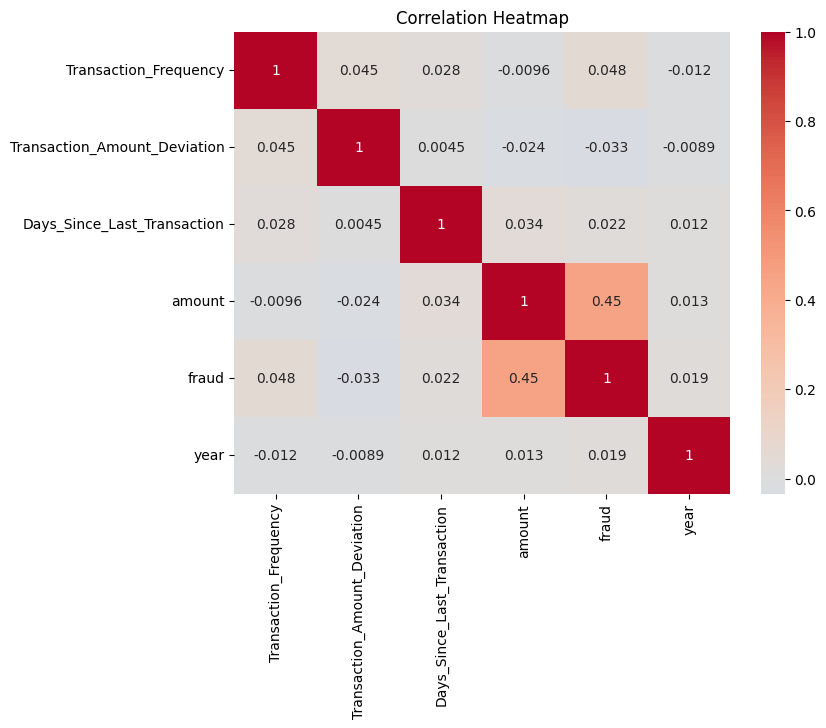

In [476]:
corr = df.corr(numeric_only=True)  # fraud categorical h to ignore ho jayega

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [477]:
import seaborn as sns

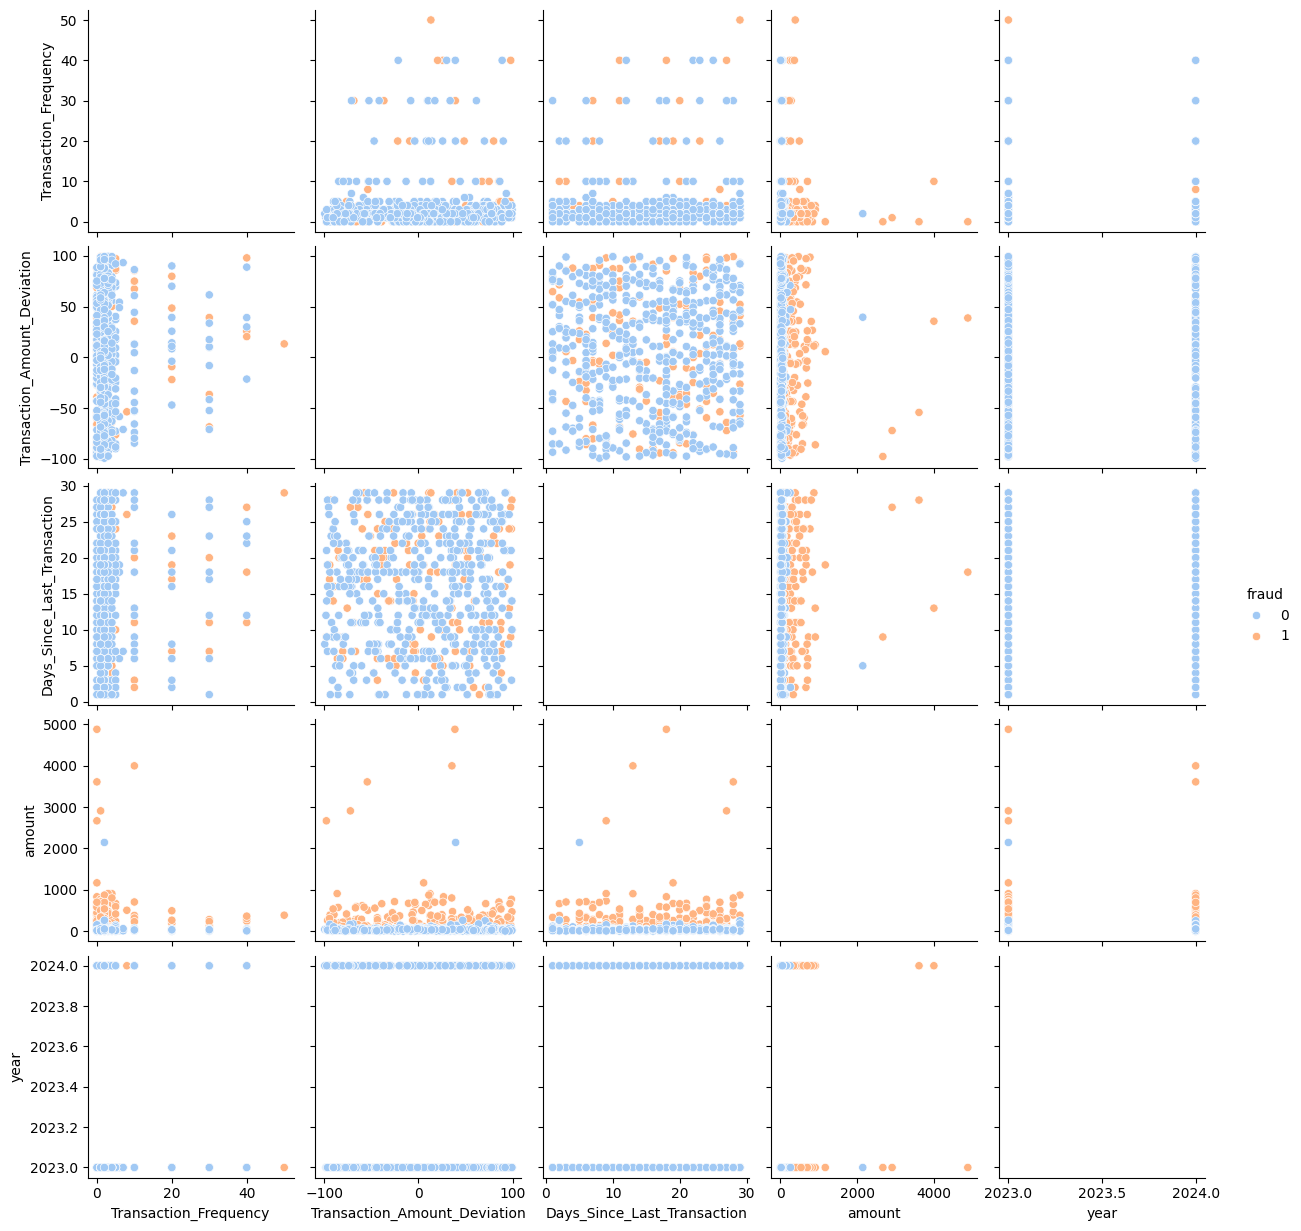

In [478]:
#visulization the different features basis of fraud occurence as a subplots
sns.pairplot(data=df , hue='fraud',palette='pastel' ,diag_kind='dist') 

-visuliazing different features basis the fraud occurence as a subplots

In [479]:
import plotly.express as px

In [480]:
#plot 1: fraud distribution as occurrence type
fig = px.bar(
    x=fraud['Transaction_Type'].value_counts().index,
    y=fraud['Transaction_Type'].value_counts().values,
    color=fraud['Transaction_Type'].value_counts().index,
    title='Fraud Distribution by Transaction Type',
    labels={'x': 'Transaction Type', 'y': 'Fraud Count'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [481]:
#plot 2 farud distribution by payment gateway 
fig = px.bar(x=fraud['Payment_Gateway'].value_counts().index,
             y=fraud['Payment_Gateway'].value_counts().values,
             title='Fraud Distribution by Payment Gateway' , 
             color=fraud['Payment_Gateway'].value_counts().index,
             labels={'x': 'Payment Gateway', 'y': 'Fraud Count'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'categoryorder': 'total descending'})

fig.show()

In [482]:
#plot 3 : fraud distribution by merchant category
fig = px.bar(x=fraud['Merchant_Category'].value_counts().index,
             y=fraud['Merchant_Category'].value_counts().values,
             color=fraud['Merchant_Category'].value_counts().index,
             title='Fraud Distribution by Merchant Category' ,
             labels={'x': 'Merchant Category', 'y': 'Fraud Count'},
               color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [ ]:
#plot 4 : distribution transaction amount
fig = px.histogram(fraud, x='amount', nbins=20, title='Transaction Amount Distribution',
                   labels={'amount': 'Transaction Amount'})
fig.show()

In [500]:
#plot5: relationship between transaction frequency and farud using scatter plot
fig = px.scatter(fraud, x='Transaction_Frequency', y='fraud',
                 title='Transaction Frequency vs Amount by Merchant Category',
                  labels={'Transaction_Frequency': 'Transaction Frequency', 'fraud': 'Transaction Amount'},
                  color='fraud' , color_discrete_map={0: 'blue', 1: 'red'})
fig.show()


In [493]:
#plot 6: relationship between days since last transaction and fraud using scatter plot
fig = px.scatter(fraud, x='Days_Since_Last_Transaction', y='fraud',
                 title='Days Since Last Transaction vs Fraud',
                 labels={'Days_Since_Last_Transaction': 'Days Since Last Transaction', 'fraud': 'Fraud Amount'},
                 color='fraud', color_discrete_map={0: 'blue', 1: 'red'}
                )
fig.show()

In [497]:
#plot 7 : fraud distribution by transaction state
fig = px.bar(x=fraud['Transaction_State'].value_counts().index,
             y=fraud['Transaction_State'].value_counts().values,
             color=fraud['Transaction_State'].value_counts().index,
             title='Fraud Distribution by Transaction State',
             labels={'x': 'Transaction State', 'y': 'Fraud Count'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [498]:
#plot 8 :relationship between device_os and fraud using scatter plot
fig = px.bar(x=fraud['Device_OS'].value_counts().index,
             y=fraud['Device_OS'].value_counts().values,
               color=fraud['Device_OS'].value_counts().index,
               title='Fraud Distribution by Device OS',
               labels={'x': 'Device OS', 'y': 'Fraud Count'},
               color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

Insights from the above visualisations:

Transaction types: Bank transfer, purchase & bill payment, are highly contributing to fraudulent transactions.

Platforms like ICICI, HDFC and GooglePay have reported the highest number of fraudulent transactions.

Merchant category: home delivery, travel bookings, utility, have reported the highest number of fraudulent transactions.

Transaction amount ranging 250 to 750 are highly sensitive to fraudulent transactions.

Transaction amount ranging 0 to 1250 are highest contributors to fraudulent transactions between FY 23–24.

Transaction frequency: 0 to 10 is highly sensitive to fraudulent transactions.

Days since last transaction feature is not contributing to the analysis as no pattern identified, hence can be dropped.

States – Himachal Pradesh, Rajasthan, Meghalaya & Bihar are highly sensitive to fraudulent transactions.

Android OS reported highest number of fraudulent transactions.

Insights from Exploratory Data Analysis for UPI Fraud Detection:

Transaction Types: Among different transaction types, such as bank transfers, purchases, and bill payments, fraudulent activities are prominently associated, indicating vulnerabilities across various transaction categories.

Platforms: Platforms like ICICI, HDFC, and GooglePay are notably prone to fraudulent transactions, suggesting a need for enhanced security measures or closer monitoring on these platforms.

Merchant Categories: Certain merchant categories, such as home delivery services, travel bookings, and utility payments, exhibit a higher incidence of fraudulent transactions, indicating potential areas of vulnerability within these sectors.

Transaction Amounts: Transactions falling within the range of 250 to 750 units demonstrate a heightened susceptibility to fraud, suggesting that fraudsters target transactions of moderate value to avoid detection.

Temporal Trends: Transactions with amounts ranging from 0 to 1250 units account for the majority of fraudulent activities between FY 23–24, emphasizing the importance of monitoring transactions within this range for potential fraud.

Transaction Frequency: Transactions occurring at a frequency of 0 to 10 instances show a higher propensity for fraud, indicating that fraudsters may exploit less frequent transactions to evade detection.

Geographical Patterns: Certain states, such as Himachal Pradesh, Rajasthan, Meghalaya, and Bihar, exhibit a higher sensitivity to fraudulent transactions, necessitating targeted interventions or heightened vigilance in these regions.

Operating Systems: Devices operating on the Android OS report a higher number of fraudulent transactions, underscoring potential vulnerabilities within this operating system or applications.

Days Since Last Transaction: The feature days since last transaction does not yield discernible patterns and does not contribute meaningfully to the analysis, thus it can be omitted from further modeling efforts to streamline the feature set.

In [501]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 154
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_Type              155 non-null    object 
 1   Payment_Gateway               155 non-null    object 
 2   Transaction_City              155 non-null    object 
 3   Transaction_State             155 non-null    object 
 4   Transaction_Status            155 non-null    object 
 5   Device_OS                     155 non-null    object 
 6   Transaction_Frequency         155 non-null    int64  
 7   Merchant_Category             155 non-null    object 
 8   Transaction_Channel           155 non-null    object 
 9   Transaction_Amount_Deviation  155 non-null    float64
 10  Days_Since_Last_Transaction   155 non-null    int64  
 11  amount                        155 non-null    float64
 12  fraud                         155 non-null    int64  
 13  year      

In [508]:
columns_to_drop = ['Days_Since_Last_Transaction', 'Transaction_Frequency', 'Transaction_Amount_Deviation',
                  'Time', 'Date', 'Device_OS', 'Transaction_Channel', 'Transaction_Status', 'Transaction_City']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   647 non-null    object 
 1   Payment_Gateway    647 non-null    object 
 2   Transaction_State  647 non-null    object 
 3   Merchant_Category  647 non-null    object 
 4   amount             647 non-null    float64
 5   fraud              647 non-null    int64  
 6   year               647 non-null    int32  
 7   month              647 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 38.0+ KB


In [510]:
df.shape

(647, 8)

In [511]:
data = df.copy()

In [512]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   647 non-null    object 
 1   Payment_Gateway    647 non-null    object 
 2   Transaction_State  647 non-null    object 
 3   Merchant_Category  647 non-null    object 
 4   amount             647 non-null    float64
 5   fraud              647 non-null    int64  
 6   year               647 non-null    int32  
 7   month              647 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 38.0+ KB


In [513]:
#converting year column to object 
data['year'] = data['year'].astype('object')

In [514]:
#extracting categorical data to columns
catergorical_columns = data.select_dtypes(include=['object']).columns
catergorical_columns

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_State',
       'Merchant_Category', 'year', 'month'],
      dtype='object')

In [516]:
from sklearn.preprocessing import LabelEncoder

cols = ['year', 'month']

Label_encoder = LabelEncoder()
for col in cols:
    data[col] = Label_encoder.fit_transform(data[col])

In [517]:
#Non-oridinal varriables
non_oridinal = ['Transaction_Type', 'Payment_Gateway', 'Merchant_Category']

In [519]:
#perfrom one hot encoding on non-oridinal varriables
data = pd.get_dummies(data, columns=non_oridinal, drop_first=True)

#convert boolean columns to interger
data = data.astype(int)

KeyError: "None of [Index(['Transaction_Type', 'Payment_Gateway', 'Merchant_Category'], dtype='object')] are in the [columns]"